In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
airbnb = pd.read_csv("seattle_01.csv")
airbnb = airbnb.drop(["Unnamed: 0"], axis = 1)

# Cleaning the data

In [3]:
airbnb.isnull().sum()

room_id                    0
host_id                    0
room_type                  0
address                    0
reviews                    0
overall_satisfaction    1473
accommodates               0
bedrooms                   0
bathrooms                  2
price                      0
last_modified              0
latitude                   0
longitude                  0
location                   0
name                       0
currency                   0
rate_type                  0
dtype: int64

In [4]:
#Filling numeric missing values

airbnb = airbnb.fillna(airbnb.mean())
airbnb.isnull().sum()

room_id                 0
host_id                 0
room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
last_modified           0
latitude                0
longitude               0
location                0
name                    0
currency                0
rate_type               0
dtype: int64

In [5]:
#Filling categorical missing values

airbnb = airbnb.fillna(method = "ffill")
airbnb.isnull().sum()

room_id                 0
host_id                 0
room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
last_modified           0
latitude                0
longitude               0
location                0
name                    0
currency                0
rate_type               0
dtype: int64

In [6]:
airbnb.to_csv("airbnb_clean.csv")

# Normalizing the data

In [7]:
airbnb.dtypes

room_id                   int64
host_id                   int64
room_type                object
address                  object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
bathrooms               float64
price                     int64
last_modified            object
latitude                float64
longitude               float64
location                 object
name                     object
currency                 object
rate_type                object
dtype: object

In [8]:
#Normalizing only the continuous values

airbnb_continuous = airbnb.drop(["room_type", "rate_type", "currency", "address", "last_modified", "location", "name"], axis = 1)
airbnb_continuous = (airbnb_continuous - airbnb_continuous.mean())/airbnb_continuous.std()
airbnb_normalized = airbnb_continuous

#Adding the categorical columns back
airbnb_normalized["room_type"] = airbnb["room_type"]
airbnb_normalized["rate_type"] = airbnb["rate_type"]
airbnb_normalized["currency"] = airbnb["currency"]
airbnb_normalized["name"] = airbnb["name"]
airbnb_normalized["address"] = airbnb["address"]
airbnb_normalized["last_modified"] = airbnb["last_modified"]
airbnb_normalized["location"] = airbnb["location"]

1. Why is normalization important?

Normalization is important since different columns may have different range of values. It helps ensure that all the columns fall within the same range of values and are dispered equally.

2. How does it affect the dataset?

It makes all the values unitless and easy to compare.

3. Different graphs to check whether the data is normal:

<AxesSubplot:xlabel='reviews', ylabel='Density'>

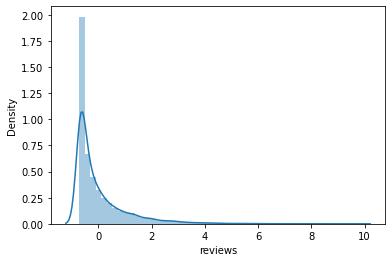

In [9]:
sns.distplot(airbnb_normalized["reviews"])

# Visualizations

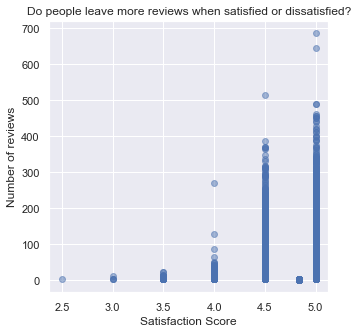

In [10]:
#Visualizations with cleaned data

import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(5,5)})

#Do people leave more reviews when satisfied or dissatisfied?
plt.scatter(airbnb['overall_satisfaction'], airbnb['reviews'], alpha = 0.5)
plt.title('Do people leave more reviews when satisfied or dissatisfied?')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of reviews')
plt.show()

<AxesSubplot:xlabel='overall_satisfaction', ylabel='reviews'>

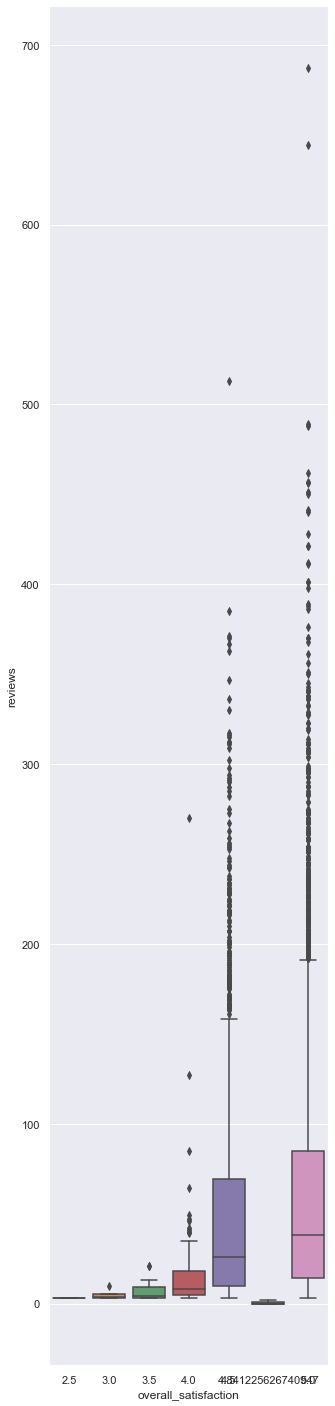

In [11]:
sns.set(rc = {'figure.figsize':(5,25.00)})
sns.boxplot(airbnb['overall_satisfaction'],airbnb['reviews'])

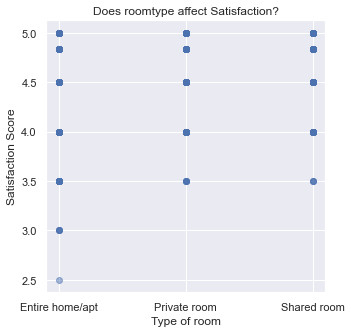

In [12]:
#Does roomtype affect Satisfaction?

sns.set(rc = {'figure.figsize':(5,5)})
plt.scatter(airbnb['room_type'], airbnb['overall_satisfaction'], alpha = 0.5)
plt.title('Does roomtype affect Satisfaction?')
plt.xlabel('Type of room')
plt.ylabel('Satisfaction Score')
plt.show()

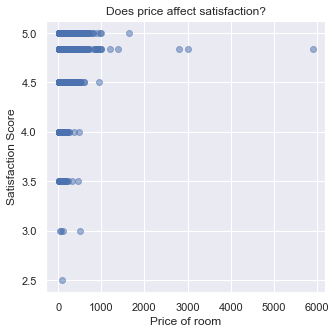

In [13]:
#Does price affect satisfaction?

sns.set(rc = {'figure.figsize':(5,5)})
plt.scatter(airbnb['price'], airbnb['overall_satisfaction'], alpha = 0.5)
plt.title('Does price affect satisfaction?')
plt.xlabel('Price of room')
plt.ylabel('Satisfaction Score')
plt.show()

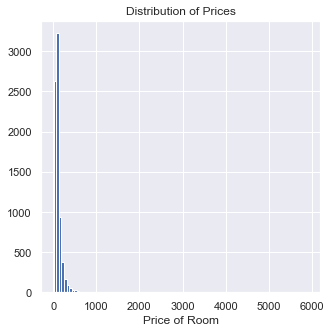

In [14]:
#What is the distribution of Prices?

sns.set(rc = {'figure.figsize':(5,5)})
plt.hist(airbnb["price"],bins=100)
plt.title('Distribution of Prices')
plt.xlabel('Price of Room')
plt.show()

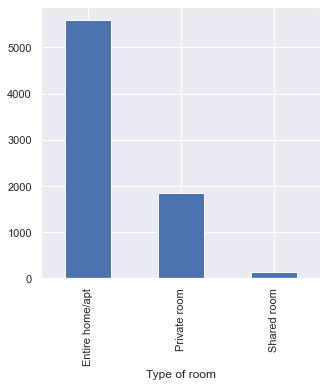

In [15]:
#How many kinds of houses are up for rental?

airbnb['room_type'].value_counts().plot(kind='bar')
plt.xlabel("Type of room")
plt.show()

<AxesSubplot:>

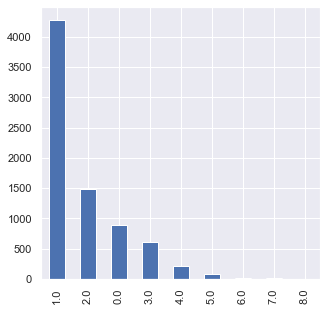

In [16]:
airbnb['bedrooms'].value_counts().plot(kind='bar')

# Hypothesis

In [17]:
#!pip install pingouin --user

In [18]:
import pingouin as pg

pg.corr(x=airbnb["price"], y=airbnb["overall_satisfaction"])

,n,r,CI95%,p-val,BF10,power
pearson,7576,0.042026,"[0.02, 0.06]",0.000253,11.613,0.955402


In [19]:
pg.corr(x=airbnb["price"], y=airbnb["bedrooms"])

,n,r,CI95%,p-val,BF10,power
pearson,7576,0.462481,"[0.44, 0.48]",0.0,inf,1.0


In [20]:
pg.corr(x=airbnb["bedrooms"], y=airbnb["overall_satisfaction"])

,n,r,CI95%,p-val,BF10,power
pearson,7576,0.028655,"[0.01, 0.05]",0.012622,0.323,0.703513


# Corelation Matrix

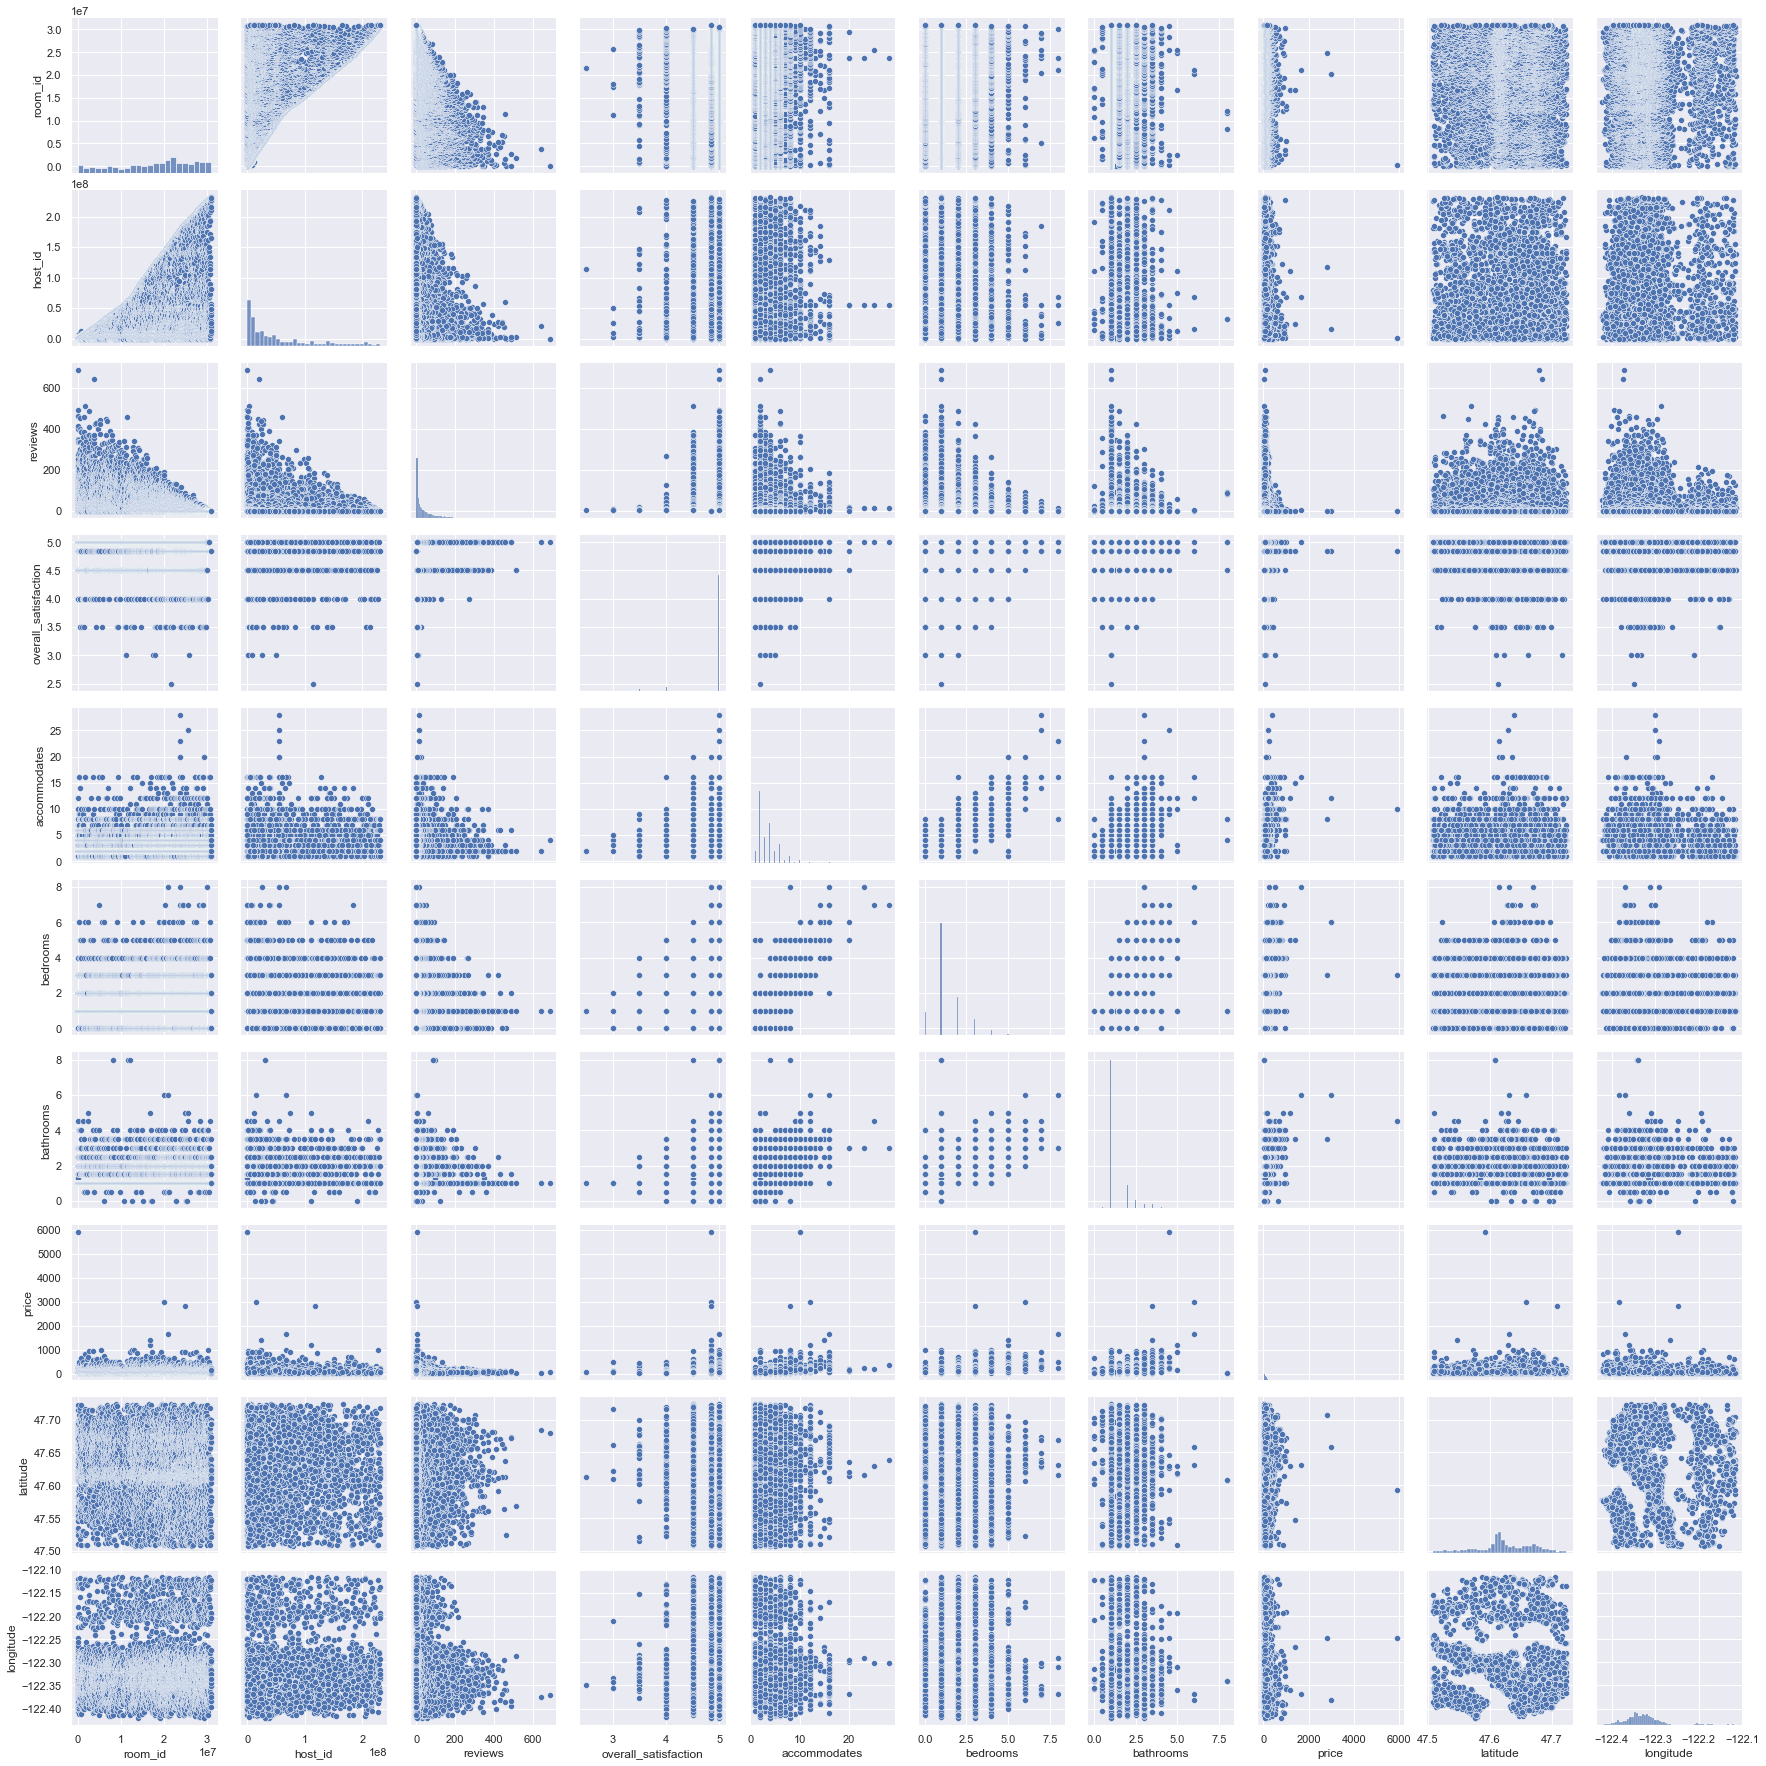

In [21]:
sns.pairplot(airbnb)

In [23]:
continuous = airbnb.drop(["room_type" , "rate_type" , "currency" ,"address","last_modified","location","name"], axis = 1)
np.cov(continuous)

array([[1.03493184e+06, 1.61893420e+06, 8.92283901e+06, ...,
        5.81926898e+10, 1.70602587e+10, 1.70603018e+10],
       [1.61893420e+06, 2.55623891e+06, 1.48752487e+07, ...,
        9.68731541e+10, 2.72101190e+10, 2.72101796e+10],
       [8.92283901e+06, 1.48752487e+07, 1.26164359e+08, ...,
        8.13635690e+11, 1.70245279e+11, 1.70245278e+11],
       ...,
       [5.81926898e+10, 9.68731541e+10, 8.13635690e+11, ...,
        5.24842100e+15, 1.10649326e+15, 1.10649332e+15],
       [1.70602587e+10, 2.72101190e+10, 1.70245279e+11, ...,
        1.10649326e+15, 2.93472947e+14, 2.93473486e+14],
       [1.70603018e+10, 2.72101796e+10, 1.70245278e+11, ...,
        1.10649332e+15, 2.93473486e+14, 2.93474024e+14]])

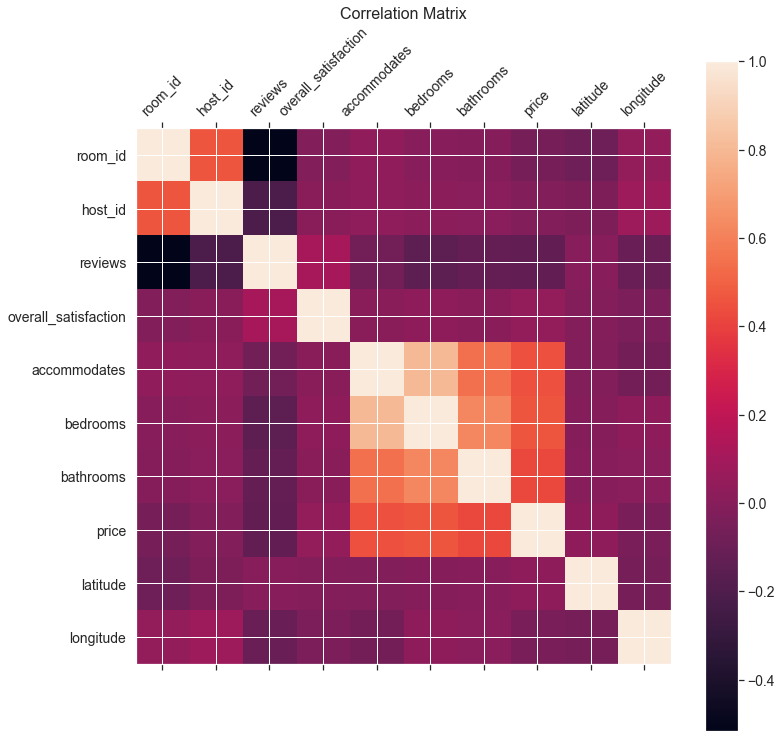

In [24]:
f = plt.figure(figsize=(12, 12))

plt.matshow(continuous.corr(), fignum=f.number)
plt.xticks(range(continuous.shape[1]), continuous.columns, fontsize=14, rotation=45)
plt.yticks(range(continuous.shape[1]), continuous.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);